In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Splitting Data

In [ ]:
# # Directory to get data from
# dir = r'/content/gdrive/MyDrive/APS360/Project/SampleDataLarge/Pneumonia-Bacterial'
# # Directory to store training set
# train_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/bacterial_train'
# # Directory to store testing set
# test_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/bacterial_val'
# # Directory to store validation path
# valid_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/bacterial_test'

# # Get the list of file paths in the directory of dataset
# files = [file for file in os.listdir(
#     dir) if os.path.isfile(os.path.join(dir, file))]
# # Input size of training set
# train_count = np.round(70 / 100 * len(files))
# # Input size of testing set
# test_count = np.round(15 / 100 * len(files))
# # Input size of validation set
# valid_count = np.round(15 / 100 * len(files))
# # Generate random numbers of file indices
# random_indices = list(random.sample(range(0, len(files)), len(files)))
# print("len(files)", len(files))

# # train_files indices
# print(random_indices)

# # training files
# train_file_index = random_indices[0:int(train_count) + 1]
# train_file_name = [files[i] for i in train_file_index]

# # testing files
# test_file_index = random_indices[int(
#     train_count) + 1:int(train_count + test_count) + 1]
# test_file_name = [files[i] for i in test_file_index]

# # validation files
# valid_file_index = random_indices[int(train_count + test_count) + 1:]
# valid_file_name = [files[i] for i in valid_file_index]

# # training files
# for train in train_file_name:
#     file = train
#     shutil.copyfile(os.path.join(dir, file), os.path.join(train_dir, file))
# # test_files
# for test in test_file_name:
#     file = test
#     shutil.copyfile(os.path.join(dir, file), os.path.join(test_dir, file))

# # valid_files
# for valid in valid_file_name:
#     file = valid
#     shutil.copyfile(os.path.join(dir, file), os.path.join(valid_dir, file))

len(files) 243
[96, 76, 10, 46, 75, 26, 53, 238, 94, 206, 117, 81, 211, 176, 200, 186, 168, 216, 63, 142, 101, 103, 167, 99, 40, 27, 161, 25, 159, 172, 228, 213, 150, 37, 4, 52, 219, 199, 160, 74, 118, 184, 58, 11, 43, 174, 192, 189, 42, 116, 209, 197, 92, 31, 239, 44, 89, 1, 203, 180, 15, 88, 131, 132, 221, 242, 173, 32, 90, 98, 64, 19, 170, 77, 236, 62, 3, 124, 163, 109, 217, 154, 12, 232, 218, 104, 57, 187, 119, 133, 0, 229, 107, 128, 195, 204, 21, 22, 47, 240, 106, 16, 149, 157, 141, 115, 130, 45, 226, 34, 48, 177, 112, 143, 193, 227, 191, 233, 205, 135, 113, 35, 123, 136, 6, 224, 114, 198, 17, 8, 87, 29, 139, 155, 166, 153, 208, 196, 223, 84, 231, 138, 14, 148, 181, 151, 59, 127, 108, 65, 202, 18, 60, 2, 183, 51, 9, 28, 105, 85, 190, 49, 220, 121, 212, 169, 80, 23, 72, 54, 13, 68, 95, 61, 20, 179, 165, 129, 5, 70, 162, 102, 137, 56, 235, 97, 110, 156, 41, 125, 207, 111, 50, 214, 144, 67, 178, 120, 222, 134, 171, 71, 215, 140, 175, 185, 158, 126, 230, 24, 182, 237, 39, 201, 7, 241,

In [ ]:
# # Directory to get data from
# dir = r'/content/gdrive/MyDrive/APS360/Project/SampleDataLarge/Pneumonia-Viral'
# # Directory to store training set
# train_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/viral_train'
# # Directory to store testing set
# test_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/viral_val'
# # Directory to store validation path
# valid_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/viral_test'

# # Get the list of file paths in the directory of dataset
# files = [file for file in os.listdir(
#     dir) if os.path.isfile(os.path.join(dir, file))]
# # Input size of training set
# train_count = np.round(70 / 100 * len(files))
# # Input size of testing set
# test_count = np.round(15 / 100 * len(files))
# # Input size of validation set
# valid_count = np.round(15 / 100 * len(files))
# # Generate random numbers of file indices
# random_indices = list(random.sample(range(0, len(files)), len(files)))
# print("len(files)", len(files))

# # train_files indices
# print(random_indices)

# # training files
# train_file_index = random_indices[0:int(train_count) + 1]
# train_file_name = [files[i] for i in train_file_index]

# # testing files
# test_file_index = random_indices[int(
#     train_count) + 1:int(train_count + test_count) + 1]
# test_file_name = [files[i] for i in test_file_index]

# # validation files
# valid_file_index = random_indices[int(train_count + test_count) + 1:]
# valid_file_name = [files[i] for i in valid_file_index]

# # training files
# for train in train_file_name:
#     file = train
#     shutil.copyfile(os.path.join(dir, file), os.path.join(train_dir, file))
# # test_files
# for test in test_file_name:
#     file = test
#     shutil.copyfile(os.path.join(dir, file), os.path.join(test_dir, file))

# # valid_files
# for valid in valid_file_name:
#     file = valid
#     shutil.copyfile(os.path.join(dir, file), os.path.join(valid_dir, file))

len(files) 250
[42, 132, 138, 171, 170, 16, 175, 152, 20, 43, 213, 176, 126, 75, 28, 87, 244, 82, 74, 109, 6, 13, 84, 52, 195, 121, 66, 118, 24, 44, 49, 232, 163, 125, 209, 14, 113, 179, 154, 124, 181, 162, 218, 95, 133, 23, 80, 127, 139, 215, 115, 99, 180, 190, 226, 246, 10, 22, 204, 249, 92, 140, 210, 131, 187, 238, 70, 212, 120, 160, 21, 104, 145, 27, 8, 60, 107, 116, 17, 228, 184, 2, 166, 3, 4, 67, 167, 111, 108, 151, 169, 100, 182, 56, 142, 36, 240, 85, 158, 219, 174, 134, 178, 102, 137, 50, 155, 235, 53, 199, 206, 248, 71, 191, 19, 62, 90, 224, 98, 149, 18, 159, 48, 221, 1, 164, 207, 51, 129, 32, 157, 97, 222, 40, 231, 29, 135, 88, 96, 130, 25, 63, 237, 77, 69, 117, 91, 31, 208, 94, 173, 86, 46, 153, 185, 64, 177, 61, 101, 205, 217, 106, 26, 200, 89, 150, 223, 93, 147, 202, 68, 114, 79, 9, 197, 168, 58, 35, 188, 54, 59, 33, 112, 15, 196, 78, 30, 0, 216, 220, 34, 45, 156, 211, 57, 203, 198, 243, 229, 136, 39, 83, 245, 72, 242, 201, 193, 234, 105, 141, 41, 76, 236, 110, 119, 227, 1

In [ ]:
# # Directory to get data from
# dir = r'/content/gdrive/MyDrive/APS360/Project/SampleDataLarge/Normal'
# # Directory to store training set
# train_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/normal_train'
# # Directory to store testing set
# test_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/normal_val'
# # Directory to store validation path
# valid_dir = r'/content/gdrive/MyDrive/APS360/Project/sample_large/normal_test'

# # Get the list of file paths in the directory of dataset
# files = [file for file in os.listdir(
#     dir) if os.path.isfile(os.path.join(dir, file))]
# # Input size of training set
# train_count = np.round(70 / 100 * len(files))
# # Input size of testing set
# test_count = np.round(15 / 100 * len(files))
# # Input size of validation set
# valid_count = np.round(15 / 100 * len(files))
# # Generate random numbers of file indices
# random_indices = list(random.sample(range(0, len(files)), len(files)))
# print("len(files)", len(files))

# # train_files indices
# print(random_indices)

# # training files
# train_file_index = random_indices[0:int(train_count) + 1]
# train_file_name = [files[i] for i in train_file_index]

# # testing files
# test_file_index = random_indices[int(
#     train_count) + 1:int(train_count + test_count) + 1]
# test_file_name = [files[i] for i in test_file_index]

# # validation files
# valid_file_index = random_indices[int(train_count + test_count) + 1:]
# valid_file_name = [files[i] for i in valid_file_index]

# # training files
# for train in train_file_name:
#     file = train
#     shutil.copyfile(os.path.join(dir, file), os.path.join(train_dir, file))
# # test_files
# for test in test_file_name:
#     file = test
#     shutil.copyfile(os.path.join(dir, file), os.path.join(test_dir, file))

# # valid_files
# for valid in valid_file_name:
#     file = valid
#     shutil.copyfile(os.path.join(dir, file), os.path.join(valid_dir, file))

len(files) 250
[128, 152, 2, 12, 42, 140, 132, 20, 1, 144, 68, 60, 16, 193, 92, 181, 18, 214, 45, 73, 227, 163, 147, 63, 151, 15, 155, 180, 179, 217, 156, 82, 65, 98, 234, 113, 50, 88, 187, 27, 7, 171, 78, 85, 173, 10, 249, 200, 197, 149, 32, 51, 35, 202, 116, 17, 19, 136, 106, 192, 13, 108, 76, 235, 125, 239, 114, 138, 216, 24, 101, 33, 130, 178, 203, 224, 182, 122, 56, 90, 231, 243, 96, 11, 150, 31, 134, 199, 39, 49, 23, 89, 186, 145, 184, 204, 206, 75, 64, 242, 226, 124, 146, 97, 109, 0, 81, 232, 104, 111, 240, 28, 133, 119, 3, 209, 222, 158, 93, 176, 4, 102, 165, 205, 143, 169, 210, 148, 67, 170, 103, 168, 74, 34, 54, 208, 123, 99, 194, 212, 153, 107, 183, 154, 166, 225, 95, 37, 5, 38, 59, 8, 131, 118, 218, 69, 112, 228, 233, 221, 71, 139, 159, 9, 246, 175, 230, 247, 237, 48, 244, 58, 53, 29, 185, 117, 94, 57, 66, 91, 161, 160, 195, 21, 207, 44, 241, 36, 83, 25, 110, 172, 86, 41, 62, 72, 22, 84, 135, 248, 236, 238, 191, 196, 30, 115, 105, 52, 201, 198, 14, 79, 220, 190, 6, 229, 223

### Load Data

In [ ]:
def load_data(batch_size=64):
  # Compose allows us to have multiple transformations to occur
  # and resize all images to 224x224
  transform_it = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

  # Save the paths of each of the different types of data that are located in my drive 
  train_path = '/content/gdrive/MyDrive/Primary Models/sample_large/train'
  val_path = '/content/gdrive/MyDrive/Primary Models/sample_large/val'
  test_path = '/content/gdrive/MyDrive/Primary Models/sample_large/test'

  # Load all of the data from my google drive
  train_data = torchvision.datasets.ImageFolder(train_path, transform=transform_it)
  val_data = torchvision.datasets.ImageFolder(val_path, transform=transform_it)
  test_data = torchvision.datasets.ImageFolder(test_path, transform=transform_it)

  return train_data, val_data, test_data


### **Training**

### ResNet Implementation


In [ ]:
resnet18 =torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
resnet18.fc=torch.nn.Linear(in_features=512, out_features=4)

In [ ]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train(model, train_data, val_data, batch_size=64, learning_rate=0.001, num_epochs=20):
    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
          
          
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              #print("GPU is Available")
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            n += 1

        # Print the accuracies of validation and training for each epoch to observe how it changes over time 
        print("epoch number: ", epoch+1, "Training accuracy: ",train_acc[epoch], "Validation accuracy: ", val_acc[epoch])
        # Save the current model (checkpoint) to a file
        #model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        #torch.save(model.state_dict(), model_path)      

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.7473841554559043 Validation accuracy:  0.7342657342657343
epoch number:  2 Training accuracy:  0.757847533632287 Validation accuracy:  0.7272727272727273
epoch number:  3 Training accuracy:  0.7713004484304933 Validation accuracy:  0.6993006993006993
epoch number:  4 Training accuracy:  0.796711509715994 Validation accuracy:  0.7202797202797203
epoch number:  5 Training accuracy:  0.8131539611360239 Validation accuracy:  0.6993006993006993
epoch number:  6 Training accuracy:  0.7982062780269058 Validation accuracy:  0.7552447552447552
epoch number:  7 Training accuracy:  0.7339312406576981 Validation accuracy:  0.7202797202797203
epoch number:  8 Training accuracy:  0.7473841554559043 Validation accuracy:  0.6993006993006993
epoch number:  9 Training accuracy:  0.8056801195814649 Validation accuracy:  0.7482517482517482
epoch number:  10 Training accuracy:  0.796711509715994 Validation accuracy:  0.727272727

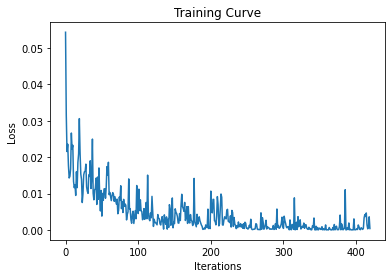

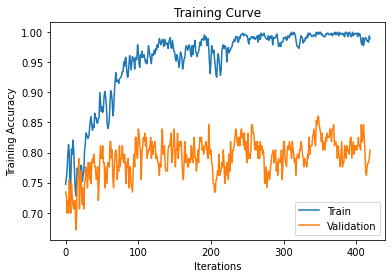

Final Training Accuracy: 0.9895366218236173
Final Validation Accuracy: 0.8041958041958042


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
#################################CONSIDER###################################################
train_data, val_data, test_data = load_data(batch_size=32)
train(resnet18, train_data, val_data, batch_size=32, learning_rate=0.001, num_epochs=20)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.7832585949177877 Validation accuracy:  0.6783216783216783
epoch number:  2 Training accuracy:  0.8101644245142003 Validation accuracy:  0.7062937062937062
epoch number:  3 Training accuracy:  0.7638266068759342 Validation accuracy:  0.7062937062937062
epoch number:  4 Training accuracy:  0.8101644245142003 Validation accuracy:  0.7482517482517482
epoch number:  5 Training accuracy:  0.820627802690583 Validation accuracy:  0.7202797202797203
epoch number:  6 Training accuracy:  0.8221225710014948 Validation accuracy:  0.7132867132867133
epoch number:  7 Training accuracy:  0.7713004484304933 Validation accuracy:  0.7132867132867133
epoch number:  8 Training accuracy:  0.7533632286995515 Validation accuracy:  0.7132867132867133
epoch number:  9 Training accuracy:  0.7802690582959642 Validation accuracy:  0.7272727272727273
epoch number:  10 Training accuracy:  0.8355754857997011 Validation accuracy:  0.7342657

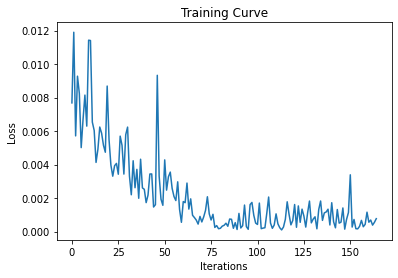

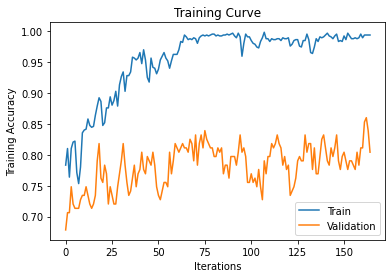

Final Training Accuracy: 0.9940209267563528
Final Validation Accuracy: 0.8041958041958042


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
#################################CONSIDER###################################################
train_data, val_data, test_data = load_data(batch_size=64)
train(resnet18, train_data, val_data, batch_size=64, learning_rate=0.001, num_epochs=15)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.6995515695067265 Validation accuracy:  0.6363636363636364
epoch number:  2 Training accuracy:  0.6696562032884903 Validation accuracy:  0.6783216783216783
epoch number:  3 Training accuracy:  0.6875934230194319 Validation accuracy:  0.6713286713286714
epoch number:  4 Training accuracy:  0.6472346786248132 Validation accuracy:  0.6503496503496503
epoch number:  5 Training accuracy:  0.6053811659192825 Validation accuracy:  0.6503496503496503
epoch number:  6 Training accuracy:  0.6517189835575485 Validation accuracy:  0.6643356643356644
epoch number:  7 Training accuracy:  0.6427503736920778 Validation accuracy:  0.6993006993006993
epoch number:  8 Training accuracy:  0.6846038863976084 Validation accuracy:  0.7342657342657343
epoch number:  9 Training accuracy:  0.7040358744394619 Validation accuracy:  0.6573426573426573
epoch number:  10 Training accuracy:  0.7234678624813154 Validation accuracy:  0.685314

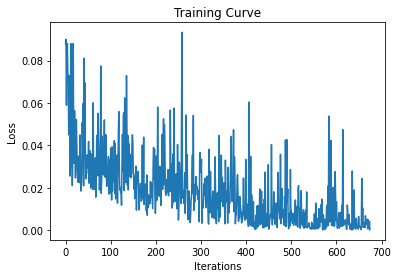

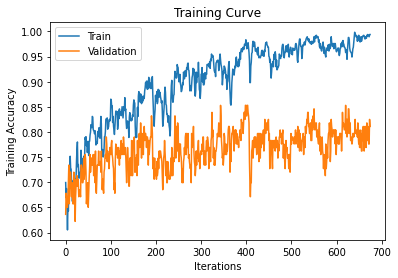

Final Training Accuracy: 0.9940209267563528
Final Validation Accuracy: 0.8111888111888111


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Smaller Batch size
#################################CONSIDER###################################################
train_data, val_data, test_data = load_data(batch_size=15)
train(resnet18, train_data, val_data, batch_size=15, learning_rate=0.001, num_epochs=15)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.2585949177877429 Validation accuracy:  0.22377622377622378
epoch number:  2 Training accuracy:  0.44095665171898357 Validation accuracy:  0.46153846153846156
epoch number:  3 Training accuracy:  0.26756352765321373 Validation accuracy:  0.2937062937062937
epoch number:  4 Training accuracy:  0.4020926756352765 Validation accuracy:  0.3706293706293706
epoch number:  5 Training accuracy:  0.44095665171898357 Validation accuracy:  0.4195804195804196
epoch number:  6 Training accuracy:  0.4319880418535127 Validation accuracy:  0.3986013986013986
epoch number:  7 Training accuracy:  0.4334828101644245 Validation accuracy:  0.3986013986013986
epoch number:  8 Training accuracy:  0.40657698056801195 Validation accuracy:  0.36363636363636365
epoch number:  9 Training accuracy:  0.4155455904334828 Validation accuracy:  0.3916083916083916
epoch number:  10 Training accuracy:  0.40508221225710017 Validation accuracy:  

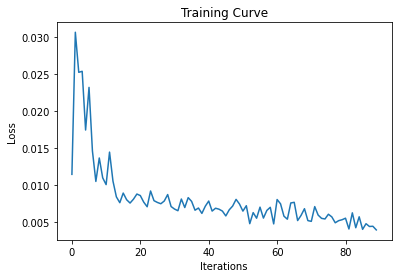

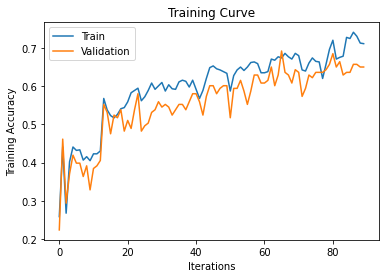

Final Training Accuracy: 0.7115097159940209
Final Validation Accuracy: 0.6503496503496503


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 128
train_data, val_data, test_data = load_data(batch_size=128)
train(resnet18, train_data, val_data, batch_size=128, learning_rate=0.01, num_epochs=15)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.7518684603886397 Validation accuracy:  0.6853146853146853
epoch number:  2 Training accuracy:  0.726457399103139 Validation accuracy:  0.6503496503496503
epoch number:  3 Training accuracy:  0.726457399103139 Validation accuracy:  0.6853146853146853
epoch number:  4 Training accuracy:  0.7354260089686099 Validation accuracy:  0.6923076923076923
epoch number:  5 Training accuracy:  0.70254110612855 Validation accuracy:  0.6853146853146853
epoch number:  6 Training accuracy:  0.7040358744394619 Validation accuracy:  0.6643356643356644
epoch number:  7 Training accuracy:  0.7115097159940209 Validation accuracy:  0.6783216783216783
epoch number:  8 Training accuracy:  0.7100149476831091 Validation accuracy:  0.6713286713286714
epoch number:  9 Training accuracy:  0.7339312406576981 Validation accuracy:  0.6223776223776224
epoch number:  10 Training accuracy:  0.7548579970104634 Validation accuracy:  0.6503496503

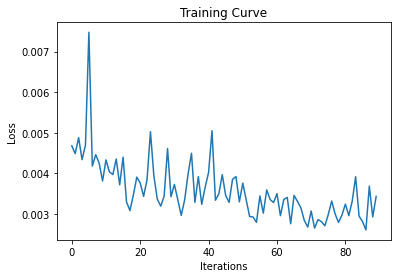

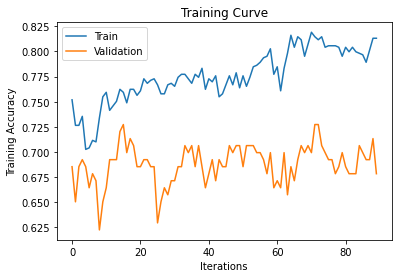

Final Training Accuracy: 0.8131539611360239
Final Validation Accuracy: 0.6783216783216783


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 128
train_data, val_data, test_data = load_data(batch_size=128)
train(resnet18, train_data, val_data, batch_size=128, learning_rate=0.001, num_epochs=15)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.4319880418535127 Validation accuracy:  0.44755244755244755
epoch number:  2 Training accuracy:  0.6502242152466368 Validation accuracy:  0.5804195804195804
epoch number:  3 Training accuracy:  0.6322869955156951 Validation accuracy:  0.6153846153846154
epoch number:  4 Training accuracy:  0.6517189835575485 Validation accuracy:  0.6503496503496503
epoch number:  5 Training accuracy:  0.6307922272047832 Validation accuracy:  0.6013986013986014
epoch number:  6 Training accuracy:  0.6083707025411061 Validation accuracy:  0.6153846153846154
epoch number:  7 Training accuracy:  0.6292974588938715 Validation accuracy:  0.6293706293706294
epoch number:  8 Training accuracy:  0.6517189835575485 Validation accuracy:  0.6293706293706294
epoch number:  9 Training accuracy:  0.6621823617339312 Validation accuracy:  0.6363636363636364
epoch number:  10 Training accuracy:  0.672645739910314 Validation accuracy:  0.622377

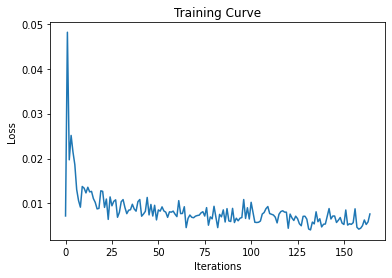

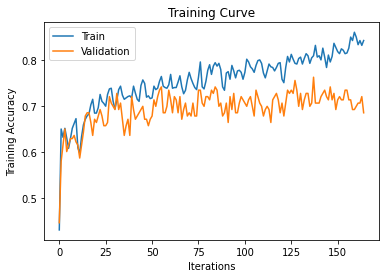

Final Training Accuracy: 0.8415545590433483
Final Validation Accuracy: 0.6853146853146853


In [ ]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet18 = resnet18.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
train_data, val_data, test_data = load_data(batch_size=64)
train(resnet18, train_data, val_data, batch_size=64, learning_rate=0.005, num_epochs=15)

### **ResNet50**

In [ ]:
torch.cuda.empty_cache()

In [ ]:
resnet50 =torchvision.models.resnet50(pretrained=True)
#fc_inputs = resnet50.fc.in_features
#print(fc_inputs)

# Freeze weights
for param in resnet50.parameters():
  param.requires_grad = False

resnet50.fc=torch.nn.Linear(in_features= 2048, out_features=4)

# print(resnet50)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.5007473841554559 Validation accuracy:  0.4965034965034965
epoch number:  2 Training accuracy:  0.4200298953662182 Validation accuracy:  0.3986013986013986
epoch number:  3 Training accuracy:  0.6218236173393124 Validation accuracy:  0.6083916083916084
epoch number:  4 Training accuracy:  0.5426008968609866 Validation accuracy:  0.5244755244755245
epoch number:  5 Training accuracy:  0.5695067264573991 Validation accuracy:  0.5664335664335665
epoch number:  6 Training accuracy:  0.6427503736920778 Validation accuracy:  0.6293706293706294
epoch number:  7 Training accuracy:  0.6098654708520179 Validation accuracy:  0.5524475524475524
epoch number:  8 Training accuracy:  0.6547085201793722 Validation accuracy:  0.6503496503496503
epoch number:  9 Training accuracy:  0.5949177877428998 Validation accuracy:  0.5874125874125874
epoch number:  10 Training accuracy:  0.5829596412556054 Validation accuracy:  0.559440

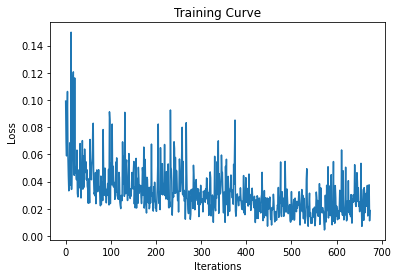

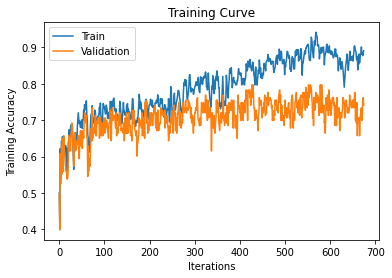

Final Training Accuracy: 0.890881913303438
Final Validation Accuracy: 0.7412587412587412


In [ ]:
#Convert to the GPU
use_cuda = True
if use_cuda and torch.cuda.is_available():
  resnet50 = resnet50.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_data, val_data, test_data = load_data(batch_size=15)
train(resnet50, train_data, val_data, batch_size=15, learning_rate=0.001, num_epochs=15)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.7832585949177877 Validation accuracy:  0.7132867132867133
epoch number:  2 Training accuracy:  0.8400597907324364 Validation accuracy:  0.7692307692307693
epoch number:  3 Training accuracy:  0.8430493273542601 Validation accuracy:  0.7552447552447552
epoch number:  4 Training accuracy:  0.8490284005979073 Validation accuracy:  0.7412587412587412
epoch number:  5 Training accuracy:  0.8400597907324364 Validation accuracy:  0.7342657342657343


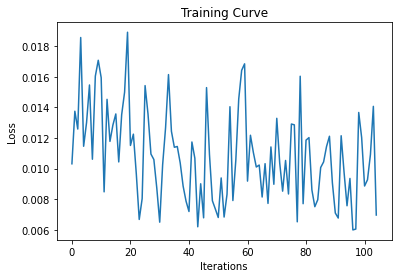

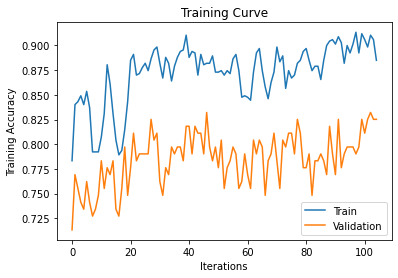

Final Training Accuracy: 0.8849028400597907
Final Validation Accuracy: 0.8251748251748252


In [21]:
#Convert to the GPU
use_cuda = True
if use_cuda and torch.cuda.is_available():
  resnet50 = resnet50.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
#################################CONSIDER###################################################
train_data, val_data, test_data = load_data(batch_size=32)
train(resnet50, train_data, val_data, batch_size=32, learning_rate=0.001, num_epochs=5)

### Resnet 101

In [26]:
resnet101=torchvision.models.resnet101(pretrained=True)
# Freeze weights
for param in resnet101.parameters():
  param.requires_grad = False
resnet101.fc=torch.nn.Linear(in_features= 2048, out_features=4)

CUDA is available!  Training on GPU ...
epoch number:  1 Training accuracy:  0.34678624813153963 Validation accuracy:  0.32867132867132864
epoch number:  2 Training accuracy:  0.5485799701046338 Validation accuracy:  0.5244755244755245
epoch number:  3 Training accuracy:  0.5171898355754858 Validation accuracy:  0.5034965034965035
epoch number:  4 Training accuracy:  0.2944693572496263 Validation accuracy:  0.3146853146853147
epoch number:  5 Training accuracy:  0.26756352765321373 Validation accuracy:  0.27972027972027974


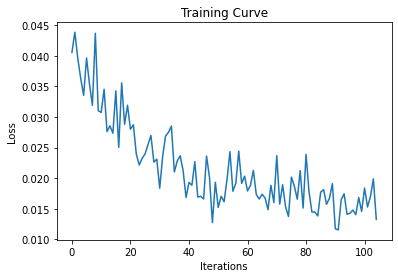

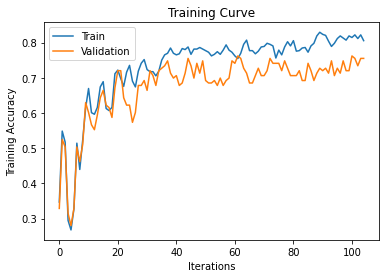

Final Training Accuracy: 0.8056801195814649
Final Validation Accuracy: 0.7552447552447552


In [28]:
#Convert to the GPU
use_cuda = True

if use_cuda and torch.cuda.is_available():
  resnet101 = resnet101.to('cuda:0')
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
# Batch Size 64
train_data, val_data, test_data = load_data(batch_size=32)
train(resnet101, train_data, val_data, batch_size=32, learning_rate=0.001, num_epochs=5)